# 어느 지역이 보험금을 잘 쓰는가?

## 보험의 종류

#### 건강보험

국민건강보험으로 우리가 흔히 아는 약국에서, 진료시에 어느정도 금액을 절감해주는 보험.

국민 상호간 위험분담 및 의료비 공동해결이라는 목적을 지니고 있음. 그렇기에 일정 법적 요건 달성시 강제로 납부의무 부여

입원시 80%, 외래진료시 병원 종류에 따라 의원 70%, 병원 60%, 종합병원 50%, 상급종합병원 40% 지원

#### 생명보험

사람의 생존 또는 사망과 관련하여 발생하는 경제적 손실을 보상해 주는 보험.

정액보상

생명보험사에서만 해당 상품 판매 가능

#### 손해보험

우연한 사건으로 발생하는 재산상 손해를 보상하는 보험

실손보상

손해보험사에서만 해당 상품 판매 가능

#### 제3보험

사람의 질병, 상해, 간병에 관해 약속한 금액을 지급하거나 그로 인한 손해를 보상하는 보험

실손보상과 정액보상 두 가지 모두를 포함.

손해보험사, 생명보험사 양사 모두에서 판매가능

갱신형 상품이 대부분으로 일반적인 정액보험과 달리 보험료가 매년 변동됨.

##### 실손보험

비용의 손해로 인한 금액을 측정해 일정금액 한도 내에서 실제 부담한 금액을 보장

##### 정액보험

질병 또는 재해로 인한 피해를 입을 경우 사전에 약정한 금액을 보장

## 자료분석

In [2]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

'%.3f'

In [3]:
#데이터 불러오기
data1= pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '38p연령성별',
                     header=[4,5], index_col = [0,1])
data2= pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '40p',
                     header=[4,5], index_col = [0,1])
data3= pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '42p',
                     header=[4,5], index_col = [0,1])
data4= pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '44p',
                     header=[4,5], index_col = [0,1])
data5= pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '46p',
                     header=[4,5], index_col = [0,1])

data1=data1.dropna()
data2=data2.dropna()
data3=data3.dropna()
data4=data4.dropna()
data5=data5.dropna()

total_data=pd.concat([data1.T,data2.T,data3.T,data4.T,data5.T]).T

In [61]:
total_data

구분
Division                                            계               \
                                         진료실인원\nPatients 내원일수\nVisit    
                                                                        
계                         Total 계 T          4.96342e+07  1.16511e+09   
                                남자 M         2.42965e+07  5.03416e+08   
                                여자 F         2.53376e+07  6.61697e+08   
서    울\nSeoul                      계   T      9.2221e+06  2.02046e+08   
                                 남자  M       4.39683e+06  8.60823e+07   
                                여자  F        4.82527e+06  1.15964e+08   
부    산\nBusan                      계   T     3.22622e+06  8.85023e+07   
                                 남자  M       1.55164e+06  3.69864e+07   
                                여자  F        1.67457e+06  5.15159e+07   
대    구\nDaegu                      계   T     2.31659e+06  5.65318e+07   
                                 남자  M       1.12158e+06  2.42336e+07   
                                여자  F        1.19501e+06  3.22982e+07   
인    천\nIncheon                    계   T     2.82126e+06  6.30116e+07   
                                 남자  M       1.38431e+06  2.73194e+07   
                                여자  F        1.43695e+06  3.56922e+07   
광    주\nGwangju                    계   T      1.3919e+06  3.44164e+07   
                                 남자  M            674528  1.47073e+07   
                                여자  F             717368  1.97091e+07   
대    전\nDaejeon                    계   T     1.40736e+06  3.36284e+07   
                                 남자  M            689084  1.46005e+07   
                                여자  F             718281  1.90279e+07   
울    산\nUlsan                      계   T     1.10159e+06  2.46982e+07   
                                 남자  M            556031   1.0995e+07   
                                여자  F             545556  1.37032e+07   
세    종\nSejong                     계   T          330066  7.02316e+06   
                                 남자  M            162776  3.13116e+06   
                                여자  F             167290    3.892e+06   
경    기\nGyonggi                    계   T     1.27705e+07  2.65817e+08   
                                 남자  M       6.31484e+06  1.17033e+08   
                                여자  F        6.45571e+06  1.48784e+08   
강    원\nGangwon                    계   T     1.45579e+06  3.28926e+07   
                                 남자  M            716561  1.45159e+07   
                                여자  F             739233  1.83766e+07   
충    북\nChungbuk                   계   T     1.54823e+06  3.74551e+07   
                                 남자  M            771528  1.64069e+07   
                                여자  F             776703  2.10482e+07   
충   남\nChungnam                    계   T     2.06826e+06  5.05758e+07   
                                 남자  M       1.03723e+06  2.23483e+07   
                                여자  F        1.03103e+06  2.82275e+07   
전    북\nJeonbuk                    계   T     1.74944e+06  5.13491e+07   
                                 남자  M            854547  2.17659e+07   
                                여자  F             894894  2.95831e+07   
전    남\nJeonnam                    계   T     1.80226e+06  5.41426e+07   
                                 남자  M            888791  2.29272e+07   
                                여자  F             913472  3.12154e+07   
경    북\nGyeongbuk                  계   T      2.5541e+06  6.59622e+07   
                                 남자  M       1.26199e+06  2.85949e+07   
                                여자  F        1.29211e+06  3.73673e+07   
경    남\nGyeongnam                  계   T     3.22667e+06   8.1606e+07   
                                 남자  M       1.59766e+06  3.51116e+07   
                                여자  F        1.62901e+06  4.64944e+07   
제    주\nJeju                       계   T          641778  

In [4]:
# 진료비-급여비=본인부담금
total_data[('계', '본인부담금')]=(total_data[('계','진료비\nMedical Expense')]-total_data[('계','급여비\nBenefit')])/total_data[('계','진료실인원\nPatients')]
total_data[('0~9세', '본인부담금')]=(total_data[('0~9세','진료비\nMedical Expense')]-total_data[('0~9세','급여비\nBenefit')])/total_data[('0~9세','진료실인원\nPatients')]
total_data[('10 ~ 19세', '본인부담금')]=(total_data[('10 ~ 19세','진료비\nMedical Expense')]-total_data[('10 ~ 19세','급여비\nBenefit')])/total_data[('10 ~ 19세','진료실인원\nPatients')]                            
total_data[('20 ~ 29세', '본인부담금')]=(total_data[('20 ~ 29세','진료비\nMedical Expense')]-total_data[('20 ~ 29세','급여비\nBenefit')])/total_data[('20 ~ 29세','진료실인원\nPatients')]
total_data[('30 ~ 39세', '본인부담금')]=(total_data[('30 ~ 39세','진료비\nMedical Expense')]-total_data[('30 ~ 39세','급여비\nBenefit')])/total_data[('30 ~ 39세','진료실인원\nPatients')]
total_data[('40 ~ 49세', '본인부담금')]=(total_data[('40 ~ 49세','진료비\nMedical Expense')]-total_data[('40 ~ 49세','급여비\nBenefit')])/total_data[('40 ~ 49세','진료실인원\nPatients')]
total_data[('50 ~ 59세', '본인부담금')]=(total_data[('50 ~ 59세','진료비\nMedical Expense')]-total_data[('50 ~ 59세','급여비\nBenefit')])/total_data[('50 ~ 59세','진료실인원\nPatients')]                                        
total_data[('60 ~ 69세', '본인부담금')]=(total_data[('60 ~ 69세','진료비\nMedical Expense')]-total_data[('60 ~ 69세','급여비\nBenefit')])/total_data[('60 ~ 69세','진료실인원\nPatients')]
total_data[('70 ~ 79세', '본인부담금')]=(total_data[('70 ~ 79세','진료비\nMedical Expense')]-total_data[('70 ~ 79세','급여비\nBenefit')])/total_data[('70 ~ 79세','진료실인원\nPatients')]
total_data[('80세 이상', '본인부담금')]=(total_data[('80세 이상','진료비\nMedical Expense')]-total_data[('80세 이상','급여비\nBenefit')])/total_data[('80세 이상','진료실인원\nPatients')]

In [5]:
total_data3 = total_data.T.iloc[[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]].T
total_data3.columns=['total','0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'above 80']

total_data4=total_data3.unstack()
new_index=['Total','Seoul','Busan','Daegu','Incheon','Gwangju','Daejeon','Ulsan','Sejong','Gyonggi','Gangwon',
          'Chungbuk','Chungnam','Jeonbuk','Jeonnam','Gyeongbuk','Gyeongnam','Jeju']
total_data4.index=new_index

total_1인당본인부담금=total_data4.stack()

total_1인당본인부담금_지역=total_1인당본인부담금.iloc[::3]
total_1인당본인부담금_지역.index=new_index

### 지역별 1인당 본인부담금

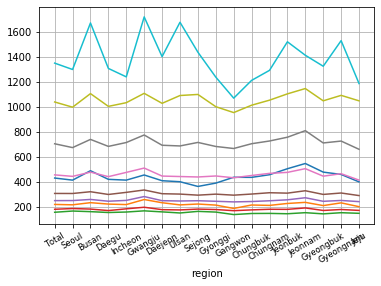

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역)
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
plt.grid(True)

지역별, 연령별로 1인당 본인부담금을 그래프로 표현.

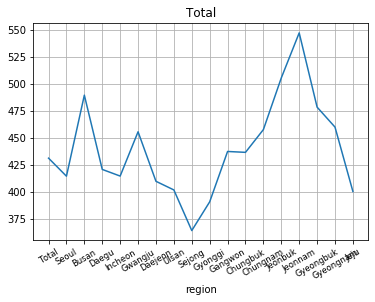

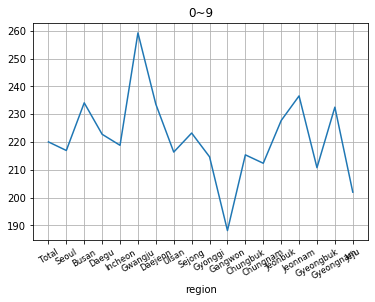

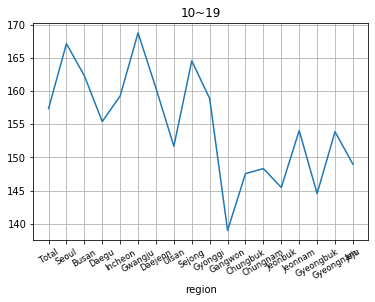

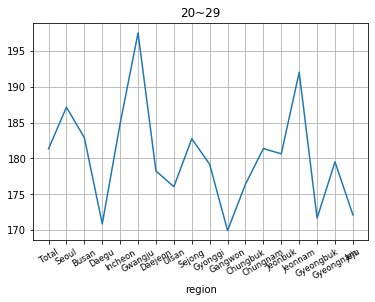

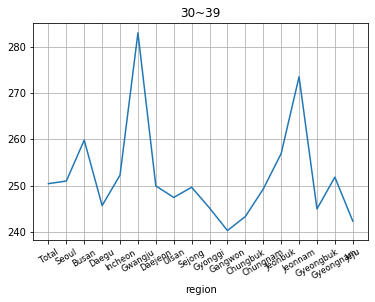

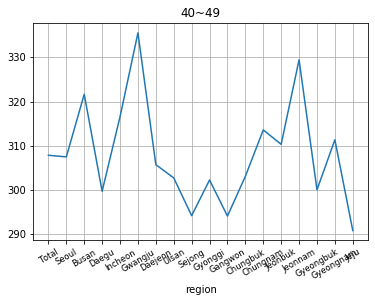

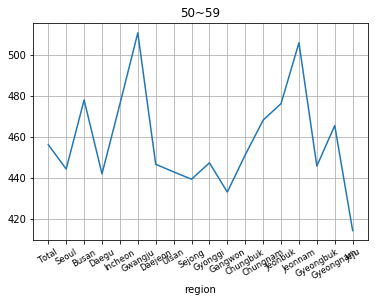

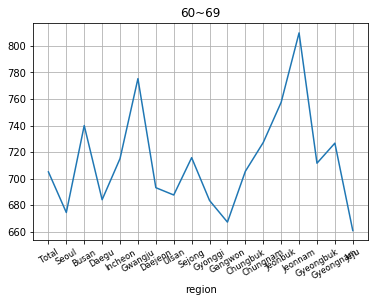

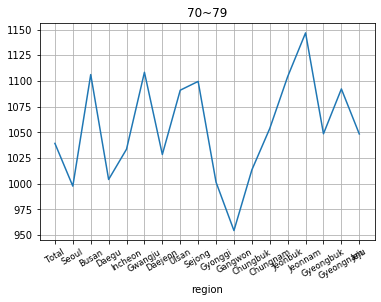

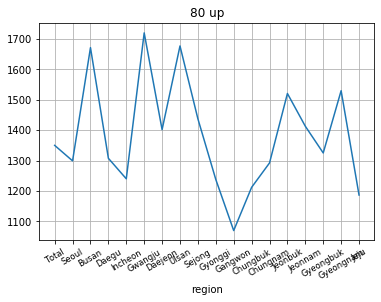

In [7]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역['total'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('Total')
plt.grid(True)

fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역['0-9'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('0~9')
plt.grid(True)

fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역['10-19'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('10~19')
plt.grid(True)

fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역['20-29'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('20~29')
plt.grid(True)

fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역['30-39'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('30~39')
plt.grid(True)

fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역['40-49'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('40~49')
plt.grid(True)

fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역['50-59'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('50~59')
plt.grid(True)

fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역['60-69'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('60~69')
plt.grid(True)

fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역['70-79'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('70~79')
plt.grid(True)

fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역['above 80'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('80 up')
plt.grid(True)

1인당 본인부담금을 연령별, 지역별로 순서대로 나열

In [8]:
total_1인당본인부담금_지역['total'].sort_values()

Sejong       363.862
Gyonggi       390.51
Jeju         400.126
Ulsan        401.559
Daejeon      409.577
Seoul        414.316
Incheon      414.434
Daegu        420.604
Total        431.072
Chungbuk     436.448
Gangwon      437.269
Gwangju      455.547
Chungnam      457.57
Gyeongnam    459.882
Gyeongbuk     478.42
Busan        489.532
Jeonbuk       505.54
Jeonnam      547.329
Name: total, dtype: object

In [9]:
total_1인당본인부담금_지역['0-9'].sort_values()

Gangwon       188.15
Jeju         201.964
Gyeongbuk    210.752
Chungnam     212.351
Gyonggi      214.666
Chungbuk     215.368
Ulsan        216.368
Seoul        216.942
Incheon      218.802
Total        220.027
Daegu        222.766
Sejong       223.204
Jeonbuk      227.697
Gyeongnam    232.513
Daejeon      233.574
Busan        234.073
Jeonnam      236.559
Gwangju       259.22
Name: 0-9, dtype: object

In [10]:
total_1인당본인부담금_지역['10-19'].sort_values()

Gangwon      139.003
Gyeongbuk    144.565
Jeonbuk      145.489
Chungbuk     147.573
Chungnam     148.318
Jeju         148.988
Ulsan        151.684
Gyeongnam    153.869
Jeonnam      154.041
Daegu        155.397
Total         157.35
Gyonggi      158.862
Incheon      159.256
Daejeon      160.415
Busan        162.289
Sejong       164.538
Seoul        167.122
Gwangju       168.74
Name: 10-19, dtype: object

In [11]:
total_1인당본인부담금_지역['20-29'].sort_values()

Gangwon      169.955
Daegu        170.882
Gyeongbuk    171.688
Jeju         172.144
Ulsan        176.066
Chungbuk     176.419
Daejeon      178.255
Gyonggi      179.185
Gyeongnam    179.523
Jeonbuk      180.646
Total         181.35
Chungnam     181.376
Sejong       182.747
Busan        182.903
Incheon      184.885
Seoul        187.135
Jeonnam      192.014
Gwangju      197.494
Name: 20-29, dtype: object

In [12]:
total_1인당본인부담금_지역['30-39'].sort_values()

Gangwon      240.279
Jeju         242.323
Chungbuk     243.315
Gyeongbuk    244.944
Gyonggi      245.148
Daegu        245.676
Ulsan        247.433
Chungnam     249.257
Sejong       249.636
Daejeon      249.932
Total        250.419
Seoul        250.977
Gyeongnam    251.815
Incheon       252.26
Jeonbuk       256.92
Busan        259.822
Jeonnam      273.509
Gwangju      282.989
Name: 30-39, dtype: object

In [13]:
total_1인당본인부담금_지역['40-49'].sort_values()

Jeju         290.815
Gangwon       294.09
Sejong       294.183
Daegu          299.7
Gyeongbuk    300.025
Gyonggi      302.253
Ulsan        302.722
Chungbuk     303.077
Daejeon      305.721
Seoul        307.476
Total        307.844
Jeonbuk      310.313
Gyeongnam    311.347
Chungnam     313.577
Incheon      316.559
Busan        321.632
Jeonnam      329.435
Gwangju      335.518
Name: 40-49, dtype: object

In [14]:
total_1인당본인부담금_지역['50-59'].sort_values()

Jeju         414.487
Gangwon      433.261
Sejong       439.529
Daegu        442.132
Ulsan        443.094
Seoul        444.483
Gyeongbuk    445.945
Daejeon      446.801
Gyonggi      447.502
Chungbuk     451.402
Total        456.378
Gyeongnam    465.681
Chungnam     468.323
Incheon      476.197
Jeonbuk      476.392
Busan         478.16
Jeonnam      506.035
Gwangju      510.866
Name: 50-59, dtype: object

In [15]:
total_1인당본인부담금_지역['60-69'].sort_values()

Jeju         660.881
Gangwon       667.23
Seoul        674.482
Gyonggi      683.526
Daegu        684.117
Ulsan        687.679
Daejeon      693.187
Total        705.095
Chungbuk     705.534
Gyeongbuk    711.646
Incheon      715.131
Sejong       715.811
Gyeongnam    726.749
Chungnam     727.263
Busan        740.001
Jeonbuk      757.554
Gwangju      775.364
Jeonnam      809.834
Name: 60-69, dtype: object

In [16]:
total_1인당본인부담금_지역['70-79'].sort_values()

Gangwon      954.459
Seoul        997.659
Gyonggi      1001.48
Daegu        1004.14
Chungbuk     1013.45
Daejeon      1028.45
Incheon       1033.6
Total        1039.24
Jeju         1048.41
Gyeongbuk    1048.58
Chungnam     1053.74
Ulsan        1090.98
Gyeongnam     1092.2
Sejong       1099.52
Jeonbuk      1104.16
Busan        1106.16
Gwangju       1108.4
Jeonnam      1146.71
Name: 70-79, dtype: object

In [17]:
total_1인당본인부담금_지역['above 80'].sort_values()

Gangwon      1069.99
Jeju         1186.73
Chungbuk     1212.01
Gyonggi      1237.88
Incheon      1240.11
Chungnam      1292.2
Seoul        1299.09
Daegu         1307.5
Gyeongbuk    1325.07
Total        1349.99
Daejeon      1401.79
Jeonnam      1412.84
Sejong       1437.23
Jeonbuk      1520.51
Gyeongnam    1529.67
Busan        1671.26
Ulsan        1676.73
Gwangju      1719.72
Name: above 80, dtype: object

1인당 본인부담금을 지역별로 나열한 것을 상위2개, 하위2개를 표시\
[가장 많이 내는 곳,두번째로 많이 내는 곳][두번째로 적게 내는 곳,가장 적게 내는 곳]

In [18]:
for i in total_1인당본인부담금_지역.columns.to_list():
    print(i,total_1인당본인부담금_지역[i].sort_values().index.to_list()[0:2],
         total_1인당본인부담금_지역[i].sort_values().index.to_list()[-2:])

total ['Sejong', 'Gyonggi'] ['Jeonbuk', 'Jeonnam']
0-9 ['Gangwon', 'Jeju'] ['Jeonnam', 'Gwangju']
10-19 ['Gangwon', 'Gyeongbuk'] ['Seoul', 'Gwangju']
20-29 ['Gangwon', 'Daegu'] ['Jeonnam', 'Gwangju']
30-39 ['Gangwon', 'Jeju'] ['Jeonnam', 'Gwangju']
40-49 ['Jeju', 'Gangwon'] ['Jeonnam', 'Gwangju']
50-59 ['Jeju', 'Gangwon'] ['Jeonnam', 'Gwangju']
60-69 ['Jeju', 'Gangwon'] ['Gwangju', 'Jeonnam']
70-79 ['Gangwon', 'Seoul'] ['Gwangju', 'Jeonnam']
above 80 ['Gangwon', 'Jeju'] ['Ulsan', 'Gwangju']


### 연령별 1인당 본인부담금

In [19]:
total_1인당본인부담금_지역_Total = total_1인당본인부담금_지역.loc['Total']
age_label = total_1인당본인부담금_지역_Total.index.to_list()

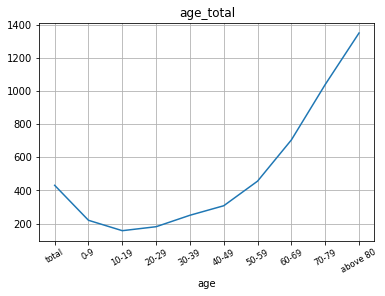

In [20]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역_Total)
labels= ax.set_xticklabels(age_label, rotation = 30, fontsize = 'small')
ax.set_xlabel('age')
ax.set_title('age_total')
plt.grid(True)

### 성별, 연령별 1인당 본인부담금

In [21]:
total_data5=total_data3.unstack()
new_index=['Total','Seoul','Busan','Daegu','Incheon','Gwangju','Daejeon','Ulsan','Sejong','Gyonggi','Gangwon',
          'Chungbuk','Chungnam','Jeonbuk','Jeonnam','Gyeongbuk','Gyeongnam','Jeju']
total_data5.index=new_index

total_1인당본인부담금_male=total_data5.stack()
total_1인당본인부담금_지역_male=total_1인당본인부담금_male.iloc[1::3]
total_1인당본인부담금_지역_male.index=new_index

total_1인당본인부담금_female=total_data5.stack()
total_1인당본인부담금_지역_female=total_1인당본인부담금_female.iloc[2::3]
total_1인당본인부담금_지역_female.index=new_index

In [22]:
total_1인당본인부담금_지역_Total_male = total_1인당본인부담금_지역_male.loc['Total']
total_1인당본인부담금_지역_Total_female = total_1인당본인부담금_지역_female.loc['Total']

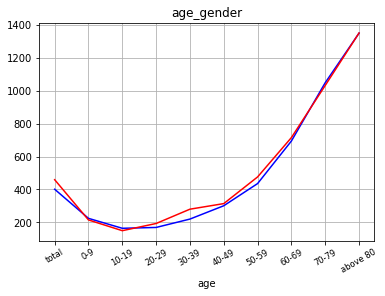

In [23]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역_Total_male, color= 'blue')
ax.plot(total_1인당본인부담금_지역_Total_female, color= 'red')
labels= ax.set_xticklabels(age_label,rotation = 30, fontsize = 'small')
ax.set_xlabel('age')
ax.set_title('age_gender')
plt.grid(True)

### 성별, 지역별 1인당 본인부담금

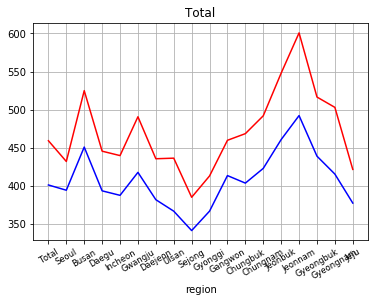

In [24]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역_male['total'], color= 'blue')
ax.plot(total_1인당본인부담금_지역_female['total'], color= 'red')
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('Total')
plt.grid(True)

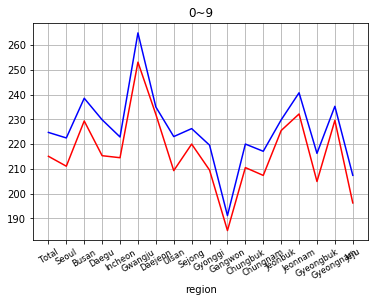

In [25]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역_male['0-9'], color= 'blue')
ax.plot(total_1인당본인부담금_지역_female['0-9'], color= 'red')
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('0~9')
plt.grid(True)

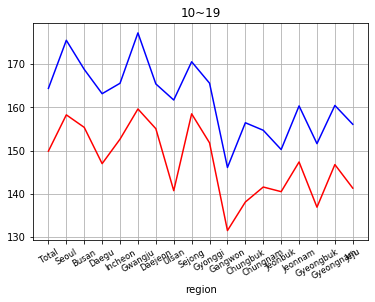

In [26]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역_male['10-19'], color= 'blue')
ax.plot(total_1인당본인부담금_지역_female['10-19'], color= 'red')
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('10~19')
plt.grid(True)

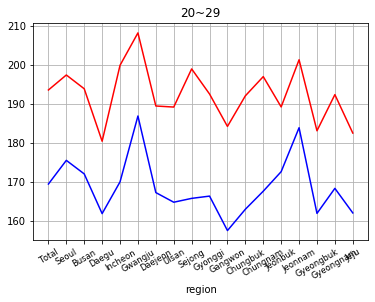

In [27]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역_male['20-29'], color= 'blue')
ax.plot(total_1인당본인부담금_지역_female['20-29'], color= 'red')
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('20~29')
plt.grid(True)

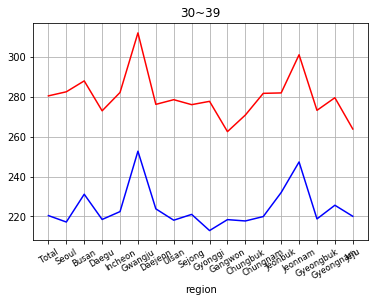

In [28]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역_male['30-39'], color= 'blue')
ax.plot(total_1인당본인부담금_지역_female['30-39'], color= 'red')
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('30~39')
plt.grid(True)

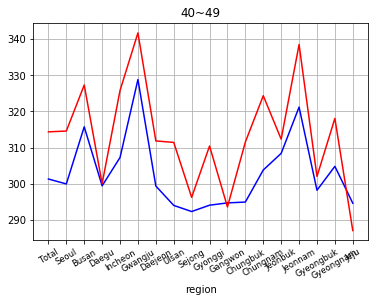

In [29]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역_male['40-49'], color= 'blue')
ax.plot(total_1인당본인부담금_지역_female['40-49'], color= 'red')
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('40~49')
plt.grid(True)

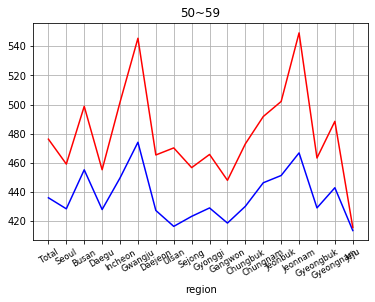

In [30]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역_male['50-59'], color= 'blue')
ax.plot(total_1인당본인부담금_지역_female['50-59'], color= 'red')
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('50~59')
plt.grid(True)

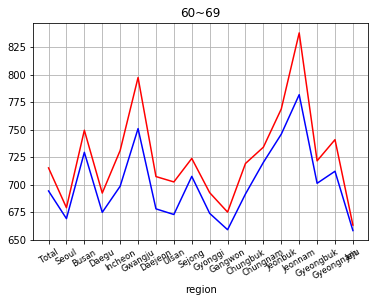

In [31]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역_male['60-69'], color= 'blue')
ax.plot(total_1인당본인부담금_지역_female['60-69'], color= 'red')
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('60~69')
plt.grid(True)

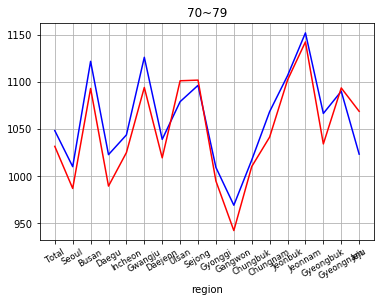

In [32]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역_male['70-79'], color= 'blue')
ax.plot(total_1인당본인부담금_지역_female['70-79'], color= 'red')
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('70~79')
plt.grid(True)

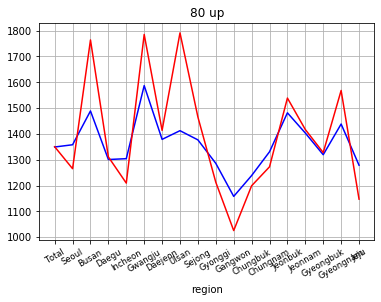

In [33]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역_male['above 80'], color= 'blue')
ax.plot(total_1인당본인부담금_지역_female['above 80'], color= 'red')
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('80 up')
plt.grid(True)

### 의료보장적용인구-Population Medical Security

의료보장 적용 인구 데이터 불러오기

In [34]:
pop_data=pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '10p_인구')

pop_data=pop_data.dropna()
pop_data.index=new_index

for col in pop_data.columns:
    if not col=='Unnamed: 1':
        del pop_data[col]
pop_data.columns=['Population']

의료 시스템 자료 불러오기

In [35]:
dat1 = pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '18p심평원', header = [4])
dat1 = dat1.dropna()
t1 = dat1[['구      분', '계\nTotal']]
t1.columns = ['구분', '요양기관']

In [36]:
dat2 = pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '20p', header = [4, 5])
dat2 = dat2.dropna()
t2 = dat2[[('구   분', 'Unnamed: 0_level_1'), ('                                계\nTotal', 'Unnamed: 1_level_1')]]
t2.columns = ['구분', '의료인력']

In [37]:
dat3 = pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '22p', header = [4, 5, 6])
dat3 = dat3.dropna()
t3 = dat3[[('구   분', 'Unnamed: 0_level_1', 'Unnamed: 0_level_2'), 
           ('계                                          Total', 'Unnamed: 1_level_1', '병실  Ward'),
           ('계                                          Total', 'Unnamed: 2_level_1', '병상  Bed')]]

In [38]:
t4 = t3[[('구   분', 'Unnamed: 0_level_1', 'Unnamed: 0_level_2'),
         ('계                                          Total', 'Unnamed: 1_level_1', '병실  Ward')]]
t4.columns = ['구분', '주요시설_병실']

In [39]:
t5 = t3[[('구   분', 'Unnamed: 0_level_1', 'Unnamed: 0_level_2'),
         ('계                                          Total', 'Unnamed: 2_level_1', '병상  Bed')]]
t5.columns = ['구분', '주요시설_병상']

In [40]:
dat4 = pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '24p', header = [4])
dat4 = dat4.dropna()
t6 = dat4[['구   분', '계\nTotal']]
t6.columns = ['구분', '주요_의료장비']

#### total 의료시스템

요양기관-Care Institutions/의료인력-Medical Personnel/병실-Ward/병상-Bed/의료장비-Medical Equipments

In [41]:
total = pd.merge(t1, t2 , on = '구분')
total = pd.merge(total, t4, on = '구분')
total = pd.merge(total, t5, on = '구분')
total = pd.merge(total, t6, on = '구분')
total.index=new_index
del total['구분']

medical_columns=['Care Institutions','Medical Personnel','Ward','Bed','Medical Equipments']
total.columns=medical_columns

In [42]:
total_no_Total=total.drop('Total')

In [43]:
new_index_no_Total=['Seoul','Busan','Daegu','Incheon','Gwangju','Daejeon','Ulsan','Sejong','Gyonggi','Gangwon',
          'Chungbuk','Chungnam','Jeonbuk','Jeonnam','Gyeongbuk','Gyeongnam','Jeju']

지역별로 의료시스템의 개수

No handles with labels found to put in legend.


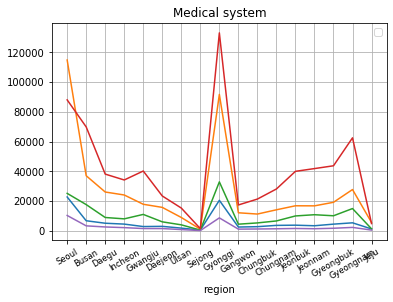

In [44]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_no_Total)
labels= ax.set_xticklabels(new_index_no_Total,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('Medical system')
ax.legend(loc = 'best')
plt.grid(True)

In [45]:
total1=total

In [46]:
population=pop_data.to_numpy()

Care_Institutions=total.to_numpy()[:,[0]]
Medical_Personnel=total.to_numpy()[:,[1]]
Ward=total.to_numpy()[:,[2]]
Bed=total.to_numpy()[:,[3]]
Medical_Equipments=total.to_numpy()[:,[4]]

In [47]:
total1['Care Institutions']=population/Care_Institutions
total1['Medical Personnel']=population/Medical_Personnel
total1['Ward']=population/Ward
total1['Bed']=population/Bed
total1['Medical Equipments']=population/Medical_Equipments

### 개당 사용가능 인구 수

즉 높을 수록 개당 사용가능 인구수가 큰 것이다.\
인구 수/기기 및 의료시스템 수

No handles with labels found to put in legend.


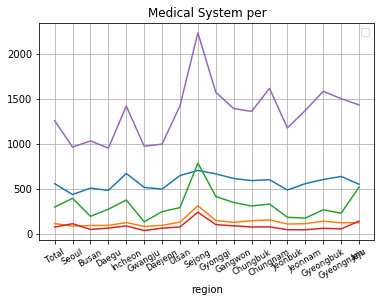

In [48]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total1)
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('Medical System per')
ax.legend(loc = 'best')
plt.grid(True)

No handles with labels found to put in legend.


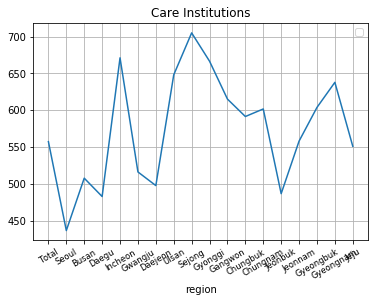

In [49]:
# Care Institutions
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total1['Care Institutions'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('Care Institutions')
ax.legend(loc = 'best')
plt.grid(True)

No handles with labels found to put in legend.


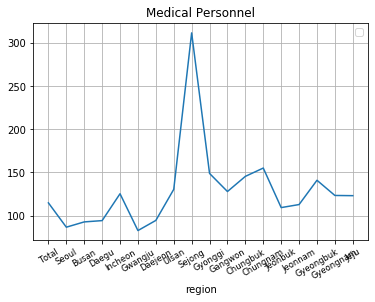

In [50]:
# Medical Personnel
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total1['Medical Personnel'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('Medical Personnel')
ax.legend(loc = 'best')
plt.grid(True)

No handles with labels found to put in legend.


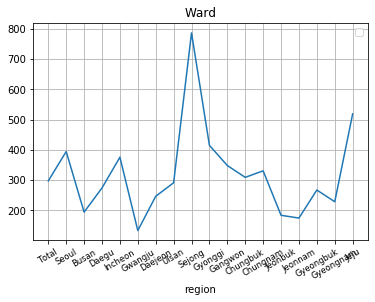

In [51]:
# Ward
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total1['Ward'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('Ward')
ax.legend(loc = 'best')
plt.grid(True)

No handles with labels found to put in legend.


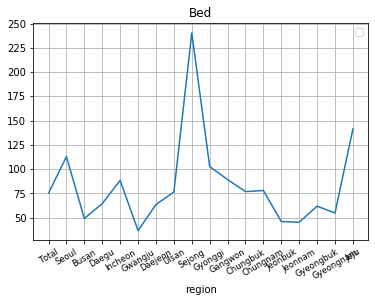

In [52]:
# Bed
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total1['Bed'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('Bed')
ax.legend(loc = 'best')
plt.grid(True)

No handles with labels found to put in legend.


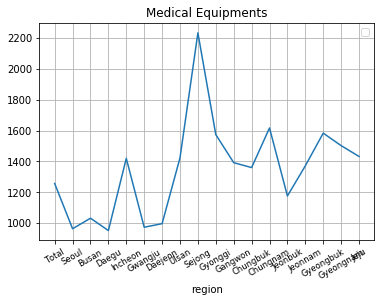

In [53]:
# Medical Equipments
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total1['Medical Equipments'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('Medical Equipments')
ax.legend(loc = 'best')
plt.grid(True)

total1은 한 기계, 의사당 환자 수 \
total1/medi_mean은 평균과의 비교. 1일경우 평균, 1보다 적을수록 평균 미만, 1보다 많을수록 평균 초과

In [54]:
medi_mean = total1.mean()
ratio_total1 = total1/medi_mean
totalll = total_1인당본인부담금_지역['total']
totalll = totalll/totalll.mean()
overall = ratio_total1.join(totalll)

In [63]:
overall

,Care Institutions,Medical Personnel,Ward,Bed,Medical Equipments,total
Total,0.970749,0.890207,0.9278,0.90085,0.932753,0.980501
Seoul,0.760752,0.671144,1.23026,1.35184,0.715172,0.942389
Busan,0.88448,0.718728,0.606673,0.588252,0.765813,1.11347
Daegu,0.841129,0.730353,0.855498,0.771573,0.706483,0.956691
Incheon,1.16869,0.972573,1.17187,1.05824,1.05358,0.942657
Gwangju,0.899156,0.640746,0.416627,0.438912,0.722495,1.03617
Daejeon,0.86697,0.732161,0.769513,0.760248,0.739637,0.93161
Ulsan,1.12855,1.01201,0.908665,0.915123,1.0559,0.913372
Sejong,1.22759,2.42201,2.45214,2.88041,1.65655,0.827629
Gyonggi,1.16067,1.1555,1.29399,1.22948,1.16763,0.888241


숫자가 작을 수록 1인당 본인부담금에 비해 의료시스템 당 사용가능 인구가 적다는 것을 뜻한다.

In [55]:
care_ratio = overall['Care Institutions']/overall['total']
care_ratio.sort_values()

Jeonbuk      0.737369
Jeonnam      0.780766
Busan        0.794343
Seoul        0.807259
Gwangju      0.867768
Daegu        0.879206
Daejeon      0.930614
Gyeongbuk    0.966331
Total        0.990054
Chungnam      1.00687
Chungbuk      1.03764
Jeju          1.05456
Gyeongnam     1.06192
Gangwon       1.07705
Ulsan         1.23558
Incheon       1.23978
Gyonggi       1.30671
Sejong        1.48326
dtype: object

In [56]:
medi_ratio = overall['Medical Personnel']/overall['total']
medi_ratio.sort_values()

Gwangju      0.618378
Busan        0.645482
Jeonnam      0.702917
Seoul        0.712173
Jeonbuk      0.737241
Daegu        0.763415
Daejeon       0.78591
Total         0.90791
Gyeongnam    0.914925
Gangwon      0.997965
Gyeongbuk     1.00528
Incheon       1.03174
Jeju          1.04947
Ulsan         1.10799
Chungbuk      1.13732
Chungnam      1.15683
Gyonggi       1.30089
Sejong        2.92644
dtype: object

In [57]:
ward_ratio = overall['Ward']/overall['total']
ward_ratio.sort_values()

Gwangju      0.402083
Jeonnam      0.438119
Jeonbuk      0.498939
Busan        0.544847
Gyeongnam    0.681849
Gyeongbuk    0.766469
Daejeon      0.826003
Daegu        0.894226
Total         0.94625
Chungbuk       0.9717
Chungnam     0.991287
Ulsan        0.994846
Gangwon        1.0921
Incheon       1.24316
Seoul         1.30547
Gyonggi        1.4568
Jeju          1.77776
Sejong        2.96285
dtype: object

In [58]:
medieq_ratio = overall['Medical Equipments']/overall['total']
medieq_ratio.sort_values()

Busan        0.687769
Gwangju      0.697274
Daegu        0.738465
Seoul        0.758893
Jeonbuk      0.758941
Daejeon      0.793934
Jeonnam      0.817392
Total        0.951302
Chungbuk      1.01659
Gangwon       1.03842
Gyeongnam     1.06566
Gyeongbuk     1.07956
Incheon       1.11767
Chungnam      1.15254
Ulsan         1.15604
Jeju          1.16763
Gyonggi       1.31455
Sejong        2.00156
dtype: object

In [59]:
#[제일 낮은 거, 두번째 낮은 거][두번째 높은 거, 제일 높은 거]
for i in total1.columns.to_list():
    print(i,total1[i].sort_values().index.to_list()[0:2],
         total1[i].sort_values().index.to_list()[-2:])

Care Institutions ['Seoul', 'Daegu'] ['Incheon', 'Sejong']
Medical Personnel ['Gwangju', 'Seoul'] ['Chungnam', 'Sejong']
Ward ['Gwangju', 'Jeonnam'] ['Jeju', 'Sejong']
Bed ['Gwangju', 'Jeonnam'] ['Jeju', 'Sejong']
Medical Equipments ['Daegu', 'Seoul'] ['Chungnam', 'Sejong']


In [60]:
#부담금이[제일 많은 곳, 두번째 많은 곳][두번째 적은 곳, 제일 적은 곳]
for i in total_1인당본인부담금_지역.columns.to_list():
    print(i,total_1인당본인부담금_지역[i].sort_values().index.to_list()[0:2],
         total_1인당본인부담금_지역[i].sort_values().index.to_list()[-2:])

total ['Sejong', 'Gyonggi'] ['Jeonbuk', 'Jeonnam']
0-9 ['Gangwon', 'Jeju'] ['Jeonnam', 'Gwangju']
10-19 ['Gangwon', 'Gyeongbuk'] ['Seoul', 'Gwangju']
20-29 ['Gangwon', 'Daegu'] ['Jeonnam', 'Gwangju']
30-39 ['Gangwon', 'Jeju'] ['Jeonnam', 'Gwangju']
40-49 ['Jeju', 'Gangwon'] ['Jeonnam', 'Gwangju']
50-59 ['Jeju', 'Gangwon'] ['Jeonnam', 'Gwangju']
60-69 ['Jeju', 'Gangwon'] ['Gwangju', 'Jeonnam']
70-79 ['Gangwon', 'Seoul'] ['Gwangju', 'Jeonnam']
above 80 ['Gangwon', 'Jeju'] ['Ulsan', 'Gwangju']
